In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker
import IPython.display

#  보간법
주어진 점을 정확히 재현하는 간단하고 편리한 식이 있는가?

# 보간 다항식의 라그랑주 형태

$n+1$개의 $n$차 다항식(AKA 기수 다항식)으로 이루어진 시스템을 정의하자.
이 다항식들은 $\ell_0, \ell_1, \dots, \ell_n$으로 표현되며, 다음의 성질을 가진다.

$$\ell_i(x_j) = \delta_{ij} = \begin{cases} 0 & (i\neq j) \\ 1 & (i = j) \end{cases}$$

이런 다항식들로부터 어떤 함수 $f$라도 다음의 **보간 다항식의 라그랑주 형태**로 보간할 수 있다.

$$p_n(x) = \sum^n_{i=0}{\ell_i(x)f(x_i)}$$

기수다항식 $\ell_i$는 다음과 같다.

$$\ell_i(x) = \prod^n_{\substack{j \neq i \\ j = 0}}{\left(\frac{x-x_j}{x_i-x_j}  \right)}$$

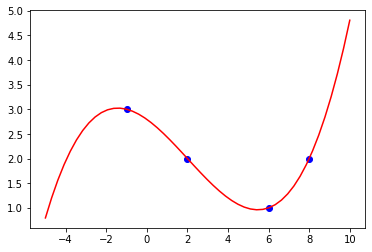

In [2]:
# some codes for 'Lagrange form'

def cardinal(xset, i, x):
    n = len(xset)
    return np.prod([(x-xset[j])/(xset[i] - xset[j]) for j in range(n) if i != j])

def lagrangian_form(xset, yset, x):
    n = len(xset)
    return np.sum([cardinal(xset, i, x)*yset[i] for i in range(n)])

_xs = [-1, 2, 6, 8]
_ys = [3, 2, 1, 2]

D = np.linspace(-5, 10)

plt.plot(D, [lagrangian_form(_xs, _ys, x) for x in D], color='red')
plt.scatter(_xs, _ys, color='blue')
plt.show()


# 보간 다항식의 뉴턴 형태

$$p_n(x) = \sum^n_{i=0}a_i{\prod^{i-1}_{j=0}{(x-x_j)}}$$

여기서 $\prod^{-1}_{j=0}{(x-x_j)}=1$로 해석한다.

# 분할차분

$p_n$의 계수 $a_0,a_1,a_2,\dots,a_n$을 체계적으로 결정하기 위해 $x$를 $x_0,x_1,x_2,\dots,x_n$으로 대체하고 그 결과식을 쓴다.
$$\begin{cases} f(x_0) = a_0 \\ f(x_1) = a_0 + a_1(x_1-x_0) \\ f(x_2) = a_0 + a_1(x_2-x_0) + a_2(x_2-x_1) \\ \vdots \end{cases}$$

이 식을 압축한 형태는 다음과 같다.
$$f(x_k) = \sum^k_{i=0}{a_i\prod^{i-1}_{j=0}{(x_k-x_j)}} \;\; (0\leq k \leq n)$$

이를 통해 $a_k$는 $f(x_0),f(x_1),\dots, f(x_k)$에 의존한다. 즉, $a_k$는 노드 $x_0,x_1,\dots, x_k$에서의 함수 $f$의 값에 의존한다. 이를 기호로 다음과 같이 나타낸다.
$$a_k = f[x_0,x_1,\dots,x_k]$$

이를 $f$에 대한 <strong>$k$차 분할차분</strong>이라고 한다.

이 표기에 의해 보간 다항식의 뉴턴 형태는 다음과 같은 형태를 취한다.

$$p_n(x) = \sum^n_{i=0}\left(f[x_0,x_1,\dots,x_i]{\prod^{i-1}_{j=0}{(x-x_j)}}\right)$$

이제 이를 통해 어떻게 분할차분을 계산할 것인가에 대한 답을 만들어 낼 수 있다. 그 답은 다음과 같다.

$$ { f[x_0,x_1,\dots,x_k] = \frac{f(x_k)-\sum^{k-1}_{i=0}{f[x_0, x_1, \dots, x_i] \prod^{i-1}_{j=0} {(x_k-x_j)} }}{\prod^{k-1}_{j=0}{(x_k-x_j)}}} $$




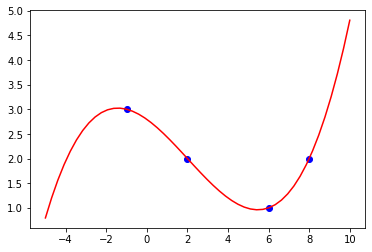

In [3]:
# some codes for 'Newton form'

def differential(xset, yset):
    k = len(xset)
    x_k = xset[k-1]
    return (yset[k-1] - (np.sum(
                [differential(xset[:(i+1)], yset[:(i+1)]) * np.prod([x_k-xset[j] for j in range(i)])
                 for i in range(k-1)
                 ]))
            ) / (np.prod([(x_k - xset[j]) for j in range(k-1)]))

def newton_form(xset, yset, x):
    n = len(xset)
    return np.sum([differential(xset[:i+1], yset[:i+1])*np.prod([x - xset[j] for j in range(i)]) for i in range(n)])

_xs = [-1, 2, 6, 8]
_ys = [3, 2, 1, 2]

D = np.linspace(-5, 10)

plt.plot(D, [newton_form(_xs, _ys, x) for x in D], color='red')
plt.scatter(_xs, _ys, color='blue')
plt.show()

## 분할차분의 성질
### 분할차분의 재귀적 성질

> $$f[x_0,x_1,\dots,x_k] = \frac{f[x_1,x_2,\dots,x_k]-f[x_0,x_1,\dots,x_{k-1}]}{x_k-x_0}$$

### 불변 정리

> 분할차분 $f[x_0,x_1,\dots,x_k]$는 $x_0,x_1,\dots,x_k$의 순서가 바뀐 모든 순열에 대해 불변이다.


In [4]:
def differential_recursive(xset, yset):
    k = len(xset)
    if k == 1:
        return yset[0]
    return (differential(xset[1:], yset[1:]) - differential(xset[:-1], yset[:-1]))/(xset[-1]-xset[0])


_xs = [-1, 2, 6, 8]
_ys = [3, 2, 1, 2]

print(f"recursive: {differential_recursive(_xs, _ys):.07f}")
print(f"   normal: {differential(_xs, _ys):.07f}")

_sxs = [2, 8, -1, 6]
_sys = [2, 2, 3, 1]

print(f"recursive: {differential_recursive(_sxs, _sys):.07f}")
print(f"   normal: {differential(_sxs, _sys):.07f}")



recursive: 0.0125661
   normal: 0.0125661
recursive: 0.0125661
   normal: 0.0125661


# 반데몬드 행렬
보간의 또 다른 시각은 주어진 데이터 점 집합에 대해 보간 함수 $f(x)$를 다음과 같이 **기저 함수** $\phi_0,\phi_1,\phi_2,\dots, \phi_n$들의 선형 결합으로 표현하는 것이다.

$$f(x) \approx c_0\phi_0(x)+c_1\phi_1(x)+c_2\phi_2(x)+\dots+c_n\phi_n(x)$$

이는 다음 형태의 선형 방정식이 성립함을 의미한다.

$$f(x_i)=c_0\phi_0(x_i)+c_1\phi_1(x_i)+c_2\phi_2(x_i)+\dots+c_n\phi_n(x_i)=y_i$$

다항식은 가장 간단하고 일반적인 기저 함수로, $\mathbb{P}_n$에 대한 자연스러운 기저들은 단항들로 이루어져 있다.

$$\phi_0(x)=1,\,\phi_1(x)=x,\,\phi_2(x)=x^2,\,\dots,\,\phi_n(x)=x^n$$

결과적으로 이에 대응하는 선형 시스템은 다음과 같은 형태를 보인다.

$$
\begin{bmatrix}
1 & x_0 & x_0^2 &\cdots & x_0^n \\
1 & x_1 & x_1^2 &\cdots & x_1^n \\
1 & x_2 & x_2^2 &\cdots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 &\cdots & x_n^n
\end{bmatrix}
\begin{bmatrix}
c_0 \\ c_1 \\ c_2 \\ \vdots \\ c_n
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}
$$

이 계수행렬을 **반데몬드 행렬**이라 부른다.


# 역보간
역함수를 근사할 때 사용한다.
